# Index
[Gathering Data](#gathering) \
[Assesing Data](#assessing) \
[Cleaning Data](#cleaning)\
[Analyzing Data](#analyzing)\
[Visualizing Data](#visualizing)\
[Time Series Analysis](#time_series)

In [2]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='gathering'></a>
# Gathering Data

In [3]:
# Reading the csv file
df = pd.read_csv('3051011_PortoAlegre_Diaria.csv', decimal = ',')

In [4]:
df.head()

,Data,Valor,Mês,Ano,Mês-Ano,ano_valido,Valor_ano_valido,Verific_7dias,Média 7dias,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Código=,3051011
0,01/01/61,0.4,1,1961,jan-61,1961.0,0.4,1,1.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02/01/61,0.0,1,1961,jan-61,1961.0,0.0,1,1.142857,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,03/01/61,0.2,1,1961,jan-61,1961.0,0.2,1,1.142857,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,04/01/61,2.4,1,1961,jan-61,1961.0,2.4,1,4.957143,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,05/01/61,0.0,1,1961,jan-61,1961.0,0.0,1,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<a id='assessing'></a>
# Assessing Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20605 entries, 0 to 20604
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Data              20605 non-null  object 
 1   Valor             20160 non-null  float64
 2   Mês               20605 non-null  int64  
 3   Ano               20605 non-null  int64  
 4   Mês-Ano           20605 non-null  object 
 5   ano_valido        19358 non-null  float64
 6   Valor_ano_valido  19292 non-null  float64
 7   Verific_7dias     20605 non-null  int64  
 8   Média 7dias       18742 non-null  float64
 9   Unnamed: 9        0 non-null      float64
 10  Unnamed: 10       0 non-null      float64
 11  Unnamed: 11       0 non-null      float64
 12  Unnamed: 12       0 non-null      float64
 13  Unnamed: 13       0 non-null      float64
 14  Código=           0 non-null      float64
 15  3051011           0 non-null      float64
dtypes: float64(11), int64(3), object(2)
memo

In [6]:
type(df.Data[1])

str

- Need to modify columns names
- Need to convert date into datetime object
- Need to delete unnecessary columns

In [7]:
df[df.Valor.isnull()]

,Data,Valor,Mês,Ano,Mês-Ano,ano_valido,Valor_ano_valido,Verific_7dias,Média 7dias,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Código=,3051011
2342,01/06/67,NaN,6,1967,jun-67,1967.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2343,02/06/67,NaN,6,1967,jun-67,1967.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2344,03/06/67,NaN,6,1967,jun-67,1967.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2345,04/06/67,NaN,6,1967,jun-67,1967.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2346,05/06/67,NaN,6,1967,jun-67,1967.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19718,27/12/14,NaN,12,2014,dez-14,2014.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19719,28/12/14,NaN,12,2014,dez-14,2014.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19720,29/12/14,NaN,12,2014,dez-14,2014.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19721,30/12/14,NaN,12,2014,dez-14,2014.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- There are 445 missing values for the precipitation height. Need to delete them or investigate a good method for filling the missing values.

In [7]:
df.Data.nunique()

20605

- There is no duplicated date entry.

### Quality issues
- Missing 445 precipitation values.


### Tidiness issues
- Column names are in Portuguese.
- There are unnecessary and empty columns.
- Dates are strings and should be converted to datetime.

<a id='cleaning'></a>
# Cleaning Data

## Define

- Delete unnecessary columns.
- Modify columns names.
- Convert date into datetime object.
- Set date as index.
- Delete missing values.

### Delete unnecessary columns
#### Code

In [9]:
# Create a new df containing only necessary columns
df_modified = df.iloc[:,:4].copy()

#### Test

In [10]:
df_modified.head()

,Data,Valor,Mês,Ano
0,01/01/61,0.4,1,1961
1,02/01/61,0.0,1,1961
2,03/01/61,0.2,1,1961
3,04/01/61,2.4,1,1961
4,05/01/61,0.0,1,1961


### Modify columns names
#### Code

In [11]:
# 'prec' stands for precipitation
df_modified.rename(columns={'Data':'date','Valor':'prec', 'Mês':'month', 'Ano': 'year'}, inplace = True)

#### Test

In [12]:
df_modified.columns

Index(['date', 'prec', 'month', 'year'], dtype='object')

### Convert date to datetime object
#### Code

In [13]:
df_modified.date.iloc[:14244] = df_modified.date.iloc[:14244].str[:-2] + '19' + df_modified.date.iloc[:14244].str[-2:]
df_modified.date.iloc[14244:] = df_modified.date.iloc[14244:].str[:-2] + '20' + df_modified.date.iloc[14244:].str[-2:]

/Library/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [14]:
df_modified.date = pd.to_datetime(df_modified.date, format = '%d/%m/%Y')

#### Test

In [15]:
type(df_modified.date[0])

pandas._libs.tslibs.timestamps.Timestamp

### Set date as index
#### Code

In [16]:
df_modified.set_index('date', inplace = True)

#### Test

In [17]:
df_modified.index

DatetimeIndex(['1961-01-01', '1961-01-02', '1961-01-03', '1961-01-04',
               '1961-01-05', '1961-01-06', '1961-01-07', '1961-01-08',
               '1961-01-09', '1961-01-10',
               ...
               '2017-05-22', '2017-05-23', '2017-05-24', '2017-05-25',
               '2017-05-26', '2017-05-27', '2017-05-28', '2017-05-29',
               '2017-05-30', '2017-05-31'],
              dtype='datetime64[ns]', name='date', length=20605, freq=None)

### Delete missing values
#### Code

In [20]:
df_modified.dropna(axis = 0, subset = ['prec'], inplace = True)

#### Test

In [21]:
df_modified[df_modified.prec.isna()]

,prec,month,year
date,,,


<a id='analyzing'></a>
# Analyze

<a id='visualizing'></a>
# Visualize

### Plotting daily precipitation

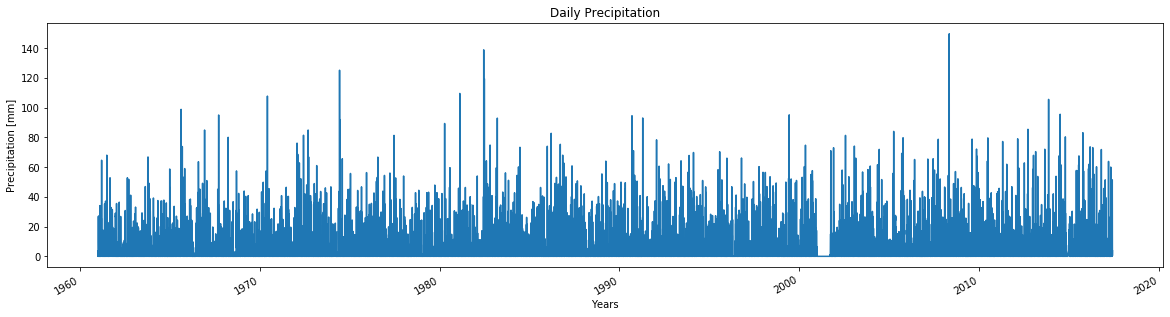

In [22]:
# Plotting daily precipitation values
df_modified.prec.plot(figsize = (20,5))
plt.xlabel('Years')
plt.ylabel('Precipitation [mm]')
plt.title('Daily Precipitation');

### Plot monthy average

In [24]:
# Get monthly total precipitation
monthly_sum = df_modified.groupby(by=[df_modified.year,df_modified.month]).prec.sum()

In [25]:
monthly_sum

year  month
1961  1         73.3
      2        153.2
      3        167.3
      4         54.4
      5         58.4
               ...  
2017  1        197.1
      2         50.5
      3        165.6
      4        114.9
      5        195.4
Name: prec, Length: 667, dtype: float64

In [26]:
# Compute monthly average
monthly_avg = monthly_sum.reset_index(level=1).groupby('month').mean()

In [27]:
monthly_avg

,prec
month,
1,107.725000
2,108.425000
3,104.283929
4,94.526786
5,99.842857
6,131.294444
7,134.145455
8,133.069091
9,138.408929


In [28]:
# Compute monthly max
monthly_max = monthly_sum.reset_index(level=1).groupby('month').max()
monthly_max

,prec
month,
1,215.4
2,251.0
3,302.4
4,244.1
5,268.6
6,365.6
7,309.2
8,330.0
9,297.8


In [29]:
# Compute monthly min
monthly_min = monthly_sum.reset_index(level=1).groupby('month').min()

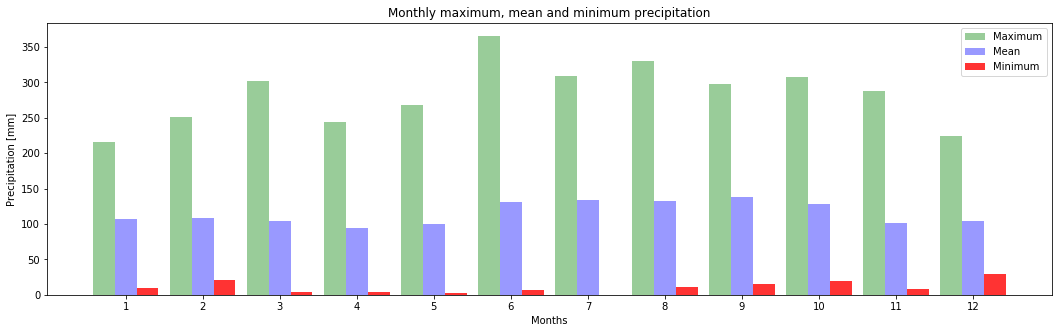

In [42]:
# Plot month average, max and min
x = np.arange(1,13)
width = 1/3 - .05
f, ax = plt.subplots(figsize=(18,5))
plt.bar(x , monthly_max.prec, width = width, color = 'g', alpha = 0.4)
plt.bar(x + width, monthly_avg.prec, width = width, color = 'b', alpha = 0.4)
plt.bar(x + 2*width, monthly_min.prec, width = width, color = 'r', alpha = 0.8)
plt.xlabel('Months')
plt.ylabel('Precipitation [mm]')
plt.xticks(x + width, labels = x)
plt.legend(['Maximum', 'Mean', 'Minimum'])
plt.title('Monthly maximum, mean and minimum precipitation');

### Plot total monthly rainfall over years

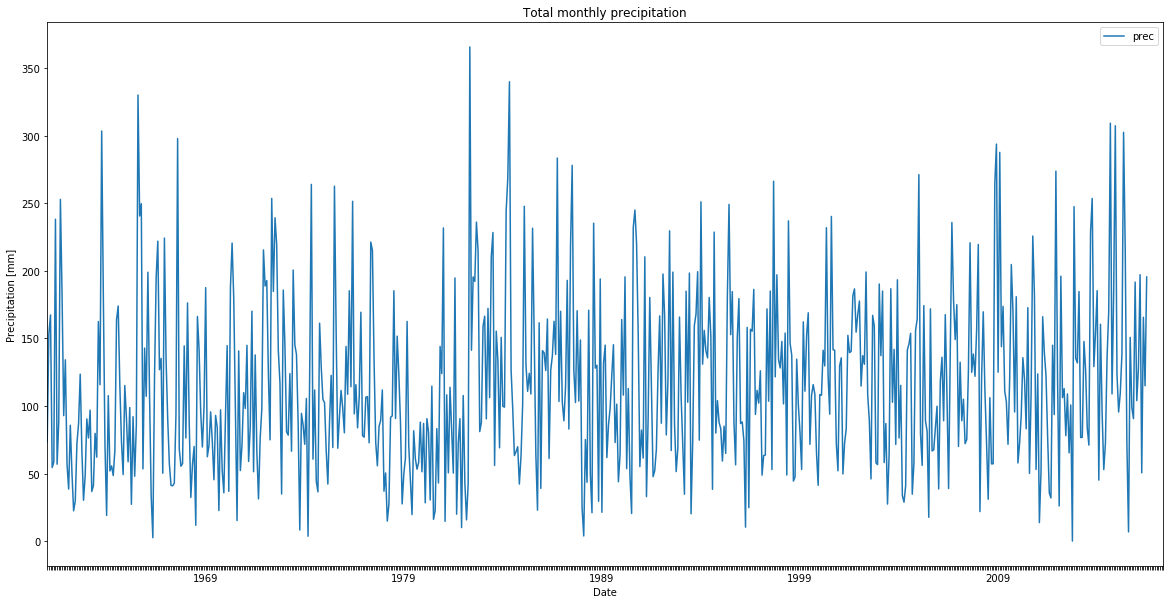

In [86]:
month_year = pd.date_range(start = df_modified.index[0], end = df_modified.index[-1], freq = 'MS')
tmp = pd.DataFrame(monthly_sum.reset_index(drop=True)) #tmp: total monthly precipitation
tmp['date'] = pd.DataFrame(month_year)
tmp.set_index('date', inplace = True)
tmp.plot(figsize=(20,10))
plt.xlabel('Date')
plt.ylabel('Precipitation [mm]')
plt.title('Total monthly precipitation');

### Plot total yearly rainfall 

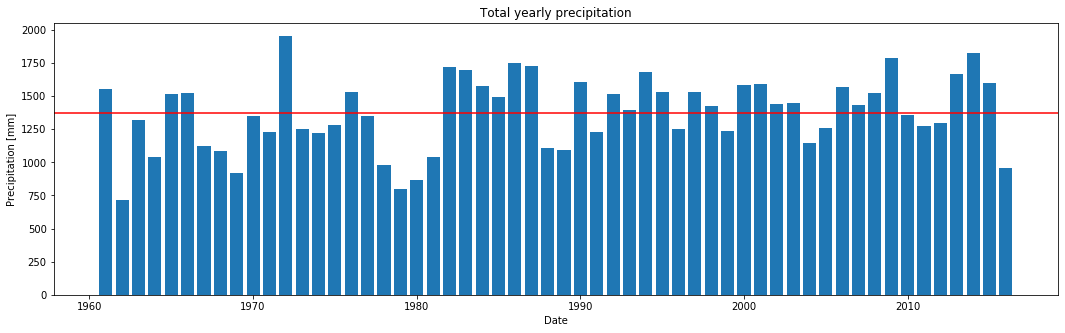

In [94]:
typ = tmp.groupby(tmp.index.year).prec.sum() # typ: total yearly precipitation
myp = typ.mean() #myp: mean yearly precipitation
f, ax = plt.subplots(figsize=(18,5))
plt.bar(typ.index, typ)
plt.xlabel('Date')
plt.ylabel('Precipitation [mm]')
plt.axhline(myp, color = 'r')
plt.title('Total yearly precipitation');

<a id='time_series'></a>
# Time Series Analysis

A time series is a series of data points that are obtained over time. Each data point is linked to a specific date.
The aim of a Time Series Analysis is to model the data, obtain statistical results regarding this data, and evaluate if the model could have forecast capabilities. 

The forecast is done considering that past values of a variable are a good indicator of future values. 
This means that is expected autocorrelation, which is the similarity between the current value of the variable and some past value. This means that for a current value X, it is expected to be found a similar value to X in a time that is the current date decreased of a certain number of lags. 
The models that are used can be either parametric, which are those that consider a finite number of parameters, or non-parametric, which are those with an infinite number of parameters.

Temporal series need to be stationary, which means that they evolve randomly in time with a constant mean and variance.
If the series is not stationary, stationarity can be obtained by transformations. These transformations are successive differences of the original series, which are computed until stationarity is reached.

The classical model for time series assumes that the series can be described as the sum of four components: trend, seasonality, cycle, and random errors.

The trend is the gradual growth or decrease of the observation over a period.
The seasonality is indicated by periodic fluctuation. This periodic fluctuation is expected to occur regularly in short periods, such as days, weeks, or months.
The cycle is similar to the seasonality, but it is expected to occur in longer periods, such as years. This cyclical component is rare and is many times not considered.
The random errors are everything that remains when all other three components are decreased. It is white noise.



### Auto Correlation Function

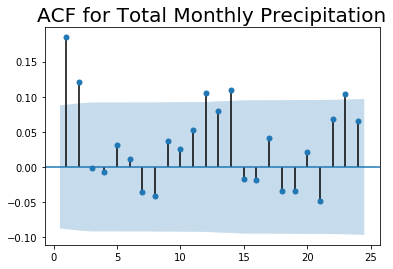

In [137]:
import statsmodels.graphics.tsaplots as sgt
sgt.plot_acf(tmp.prec.iloc[:-167], zero = False, lags = 24)
plt.title('ACF for Total Monthly Precipitation', size = 20)
plt.show()

* ACF includes direct and indirect influence of past events in the present event.
* We can observe that values decrese a lot and the behaviour of present values are different from the one observed in past values.
* There are values significantly different from zero for the lags 2, 12 and 14.
* The ACF gives an indication for defining the moving avarage model lag (q). This lag gives a clue of the biggest lag that values are expected to have some autocorrelation. After this lag, values are not considered significant in the ACF plot.

### Partial Auto Correlation Function

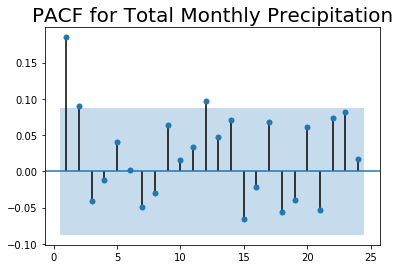

In [165]:
sgt.plot_pacf(tmp.prec.iloc[:-167], zero = False, lags = 24)
plt.title('PACF for Total Monthly Precipitation', size = 20)
plt.show()

* It is possible to notice values significantly different from zero for lags 2 and 12.
At first, we have the autoregression model AR(p). This is basically a regression of the time series onto itself. Here, we assume that the current value depends on its previous values with some lag. It takes a parameter p which represents the maximum lag. To find it, we look at the partial autocorrelation plot and identify the lag after which most lags are not significant.

### Trend

In [140]:
import pymannkendall as mk
# See documentation https://pypi.org/project/pymannkendall/
# Does not consider serial correlation or seasonal effects
result = mk.original_test(tmp.prec.iloc[:-167])
print(result)

Mann_Kendall_Test(trend='increasing', h=True, p=0.00048054661408492017, z=3.491372026481351, Tau=0.10446492985971943, s=13032.0, var_s=13930388.666666666, slope=0.06549044289682161)


In [145]:
# Consider serial correlation or seasonal effects
mk.correlated_seasonal_test(tmp.prec.iloc[:-167],  period = 12)

Correlated_Seasonal_Mann_Kendall_test(trend='increasing', h=True, p=0.013653091669093342, z=2.4662633399861056, Tau=0.1076219512195122, s=1059.0, var_s=184379.6666666667, slope=0.7999999999999985)

* The Mann-Kendall test finds evidence to conclude that there is an increasing trend.

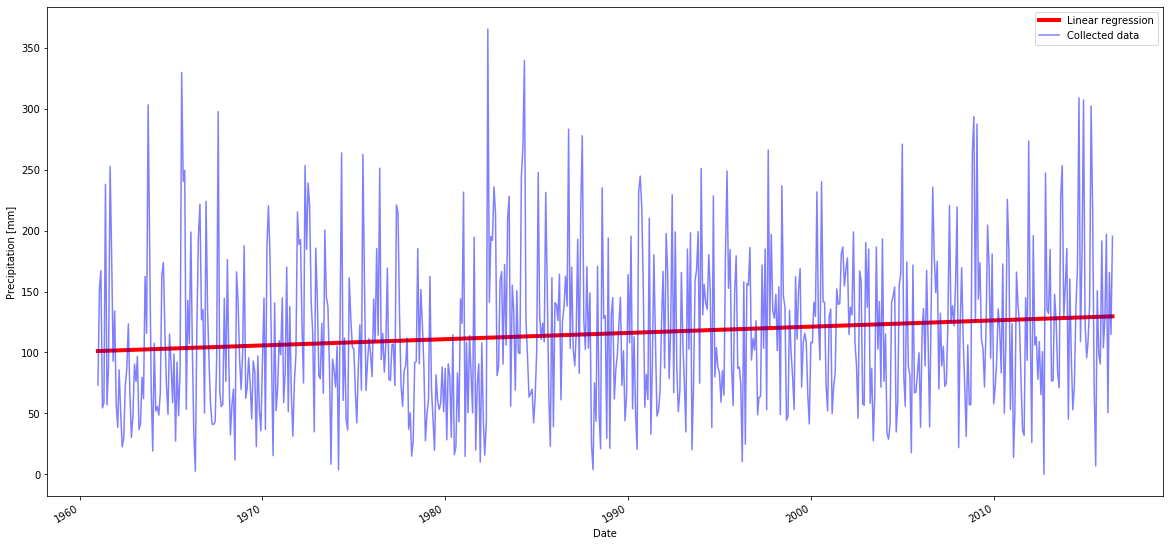

In [164]:
import scipy.stats as sp

y = np.array(tmp.prec.values, dtype=float)
x = np.array(tmp.index.values, dtype=float)
slope, intercept, r_value, p_value, std_err = sp.linregress(x,y)
xf = np.linspace(min(x),max(x),100)
xf1 = xf.copy()
xf1 = pd.to_datetime(xf1)
yf = (slope*xf) + intercept

f, ax = plt.subplots(1, 1)
ax.plot(xf1, yf, label = 'Linear regression', lw = 4, color = 'r')
tmp.prec.plot(color = 'b', alpha=0.5, figsize = (20,10), label = 'Collected data')
plt.ylabel('Precipitation [mm]')
plt.xlabel('Date')
ax.legend();

* In this simple linear regression, we can verify a linear trend. However, further investigations need to be done.

### Seasonality

In [130]:
from scipy import stats
stats.kruskal(tmp.prec.iloc[:-167],tmp.prec.iloc[-167:], nan_policy='omit')

KruskalResult(statistic=3.899672453121123, pvalue=0.04829552270587032)

* The Kruskal-Wallis test can be used in order to check fo seasonality. The low p-value indicates that there is evidence for the presence of seasonality.
* A possible indication of seasonality can sometimes be verified in the autocorrelation plots. This indication occurs if there is any pattern similar to a sinusoidal function. In the present analysis they are not observed.

### Stationarity

In [116]:
import statsmodels.tsa.stattools as sts
sts.adfuller(tmp.prec)

(-15.688904843712562,
 1.4419466525828255e-28,
 1,
 665,
 {'1%': -3.4402217619947315,
  '5%': -2.865896026254794,
  '10%': -2.5690897354287974},
 7201.488246907926)

* The null hypothesis is that the data is non-stationary.
* If the the test statistic is smaller than threshold, we have evidence to reject the null hypothesis.
* Considering the presented values, the data could be considered stationary.
* Moreover, the p-value associated with the test statistic indicates that there is near 0% chance of not rejecting the null.

/Library/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


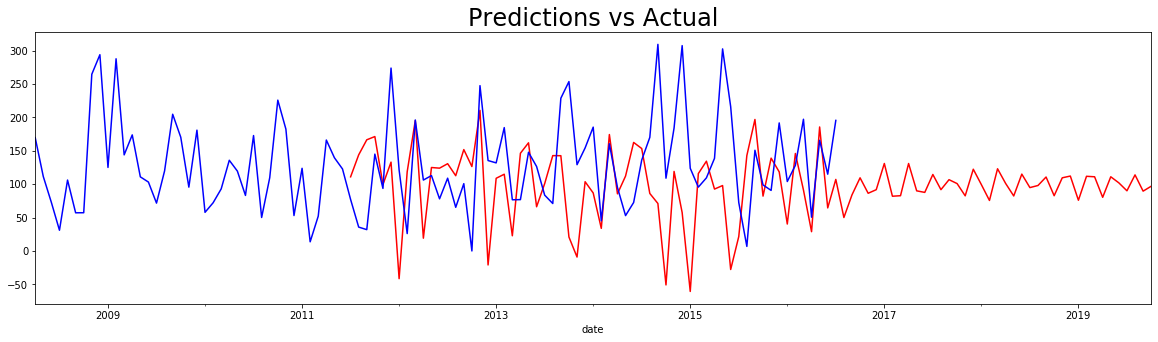

In [176]:
from statsmodels.tsa.arima_model import ARIMA
## ARIMA(1,1,1)
model_ar_1_i_1_ma_1 = ARIMA(tmp.prec, order = (6,1,6))
results_ar_1_i_1_ma_1 = model_ar_1_i_1_ma_1.fit()
results_ar_1_i_1_ma_1.summary()

tmp['res_ar_1_I_1_ma_1'] = results_ar_1_i_1_ma_1.resid

start_date = '2004-05-01'
end_date = '2019-10-01'
df_pred = results_ar_1_i_1_ma_1.predict(start = start_date, end=end_date)
df_pred

(df_pred[-100:]+100).plot(figsize = (20,5), color = "red")
tmp.prec[-100:].plot(color = "blue")
plt.title("Predictions vs Actual", size = 24)
plt.show()

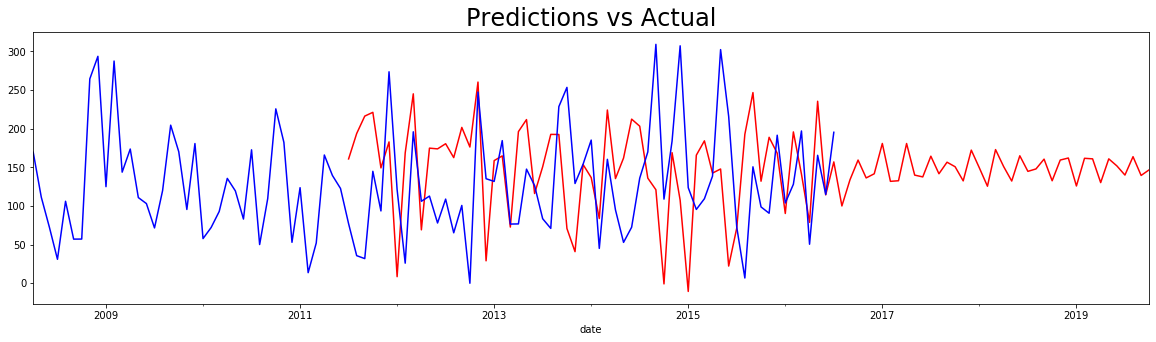

In [177]:
(df_pred[-100:]+150).plot(figsize = (20,5), color = "red")
tmp.prec[-100:].plot(color = "blue")
plt.title("Predictions vs Actual", size = 24)
plt.show()